In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
global L, B
L = 5
B = 1

def Sarr(L) :
  return np.random.choice([-1, 1], size=(L, L))

def neighbor(value,L):
    if value % L == 0:
        left = value + L - 1
        right = value + 1
    elif value % L == L - 1:
        left = value - 1
        right = value - L + 1
    else:
        left = value - 1
        right = value + 1

    if value < L:
        up = L ** 2 - L + value
        down = value + L
    elif value >= L ** 2 - L:
        up = value - L
        down = value - (L ** 2 - L)
    else:
        up = value - L
        down = value + L

    return [left, right, up, down]

def energy(S,L) :
    E = 0
    num = np.arange(L**2).reshape((L,L))
    for i in range(L**2) :
      temp=neighbor(i,L)
      n = S[np.where(num==i)]
      l = S[np.where(num==temp[0])]
      r = S[np.where(num==temp[1])]
      u = S[np.where(num==temp[2])]
      d = S[np.where(num==temp[3])]
      value = n*(l+r+u+d)
      E += value
    return float(-E/2)

def new_energy(new,L,i,j) :
    num = np.arange(L**2).reshape((L,L))
    temp=neighbor(num[i,j],L)
    n = new[i,j]
    l = new[np.where(num==temp[0])]
    r = new[np.where(num==temp[1])]
    u = new[np.where(num==temp[2])]
    d = new[np.where(num==temp[3])]
    change = 2*n*(l+r+u+d)
    return float(change)

def alp(old,new,B):
  ex4 = np.exp(-B*4)
  ex8 = np.exp(-B*8)
  ex_dict = {4 : ex4, 8 : ex8}
  if old < new :
    result = ex_dict[new-old]
  else :
    result = 1
  return result

<ipython-input-13-d991d8742433>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-E/2)
<ipython-input-13-d991d8742433>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(change)


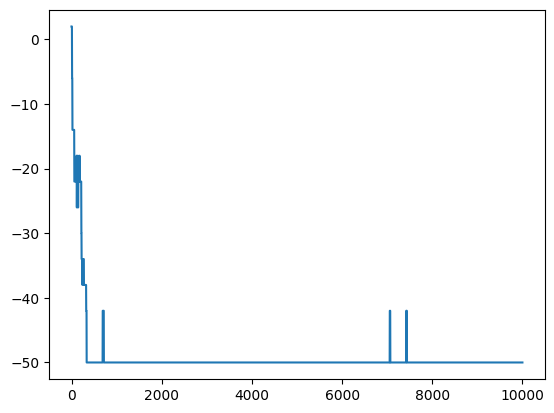

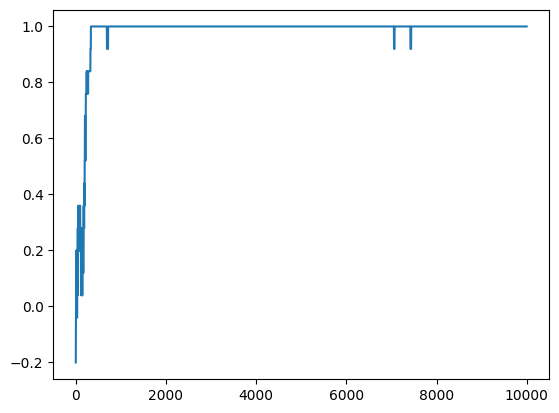

In [14]:
L = 5
B = 1
S = Sarr(L)
E_list = []
m_list = []
old = energy(S,L)

for _ in range(10000) :
    random_index = np.random.randint(0, L, size=2)
    i, j = random_index
    new_S = np.copy(S)
    new_S[i, j] *= -1
    new = old - new_energy(new_S,L,i,j)
    p = alp(old,new,B)
    value = np.random.choice([old, new], p=[1-p, p])
    if value == new :
      S = new_S
      old = new

    E_list.append(old)
    m_list.append(np.sum(S)/L**2)

plt.plot(E_list)
plt.show()
plt.plot(m_list)
plt.show()

In [29]:
def calc(a) :
  L = a
  Emean = []
  Smean = []
  err = []

  for b in np.arange(0,1.0,0.1) :
    B = b
    S = Sarr(L)
    E_list = []
    m_list = []
    old = energy(S,L)

    for _ in range(10000) :
      random_index = np.random.randint(0, L, size=2)
      i, j = random_index
      new_S = np.copy(S)
      new_S[i, j] *= -1
      new = old - new_energy(new_S,L,i,j)
      p = alp(old,new,B)
      value = np.random.choice([old, new], p=[1-p, p])
      if value == new :
        S = new_S
        old = new

      E_list.append(old)
      m_list.append(np.sum(S)/L**2)

    E_list = E_list[500:] # 수렴이전 부분 삭제
    m_list = m_list[500:]

    T = 0
    for c in range(1,1000) :
      T += float(pd.Series(m_list).autocorr(c))
    T = round(T)*2
    if T == 0 :
      T = 5
    am_list = m_list[::T]
    aE_list = E_list[::T]

    E_b = sum(aE_list)/len(aE_list)
    S_b = abs(sum(am_list))/len(am_list)
    Emean.append(E_b)
    Smean.append(S_b)
    sig = np.sqrt(np.sum((np.abs(np.array(am_list))-S_b)**2)/len(am_list))
    err.append(sig/np.sqrt(len(am_list)-1))

  return Emean, Smean, err

In [37]:
L5 = calc(5)
L10 = calc(10)
L20 = calc(20)

<ipython-input-13-d991d8742433>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-E/2)
<ipython-input-13-d991d8742433>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(change)


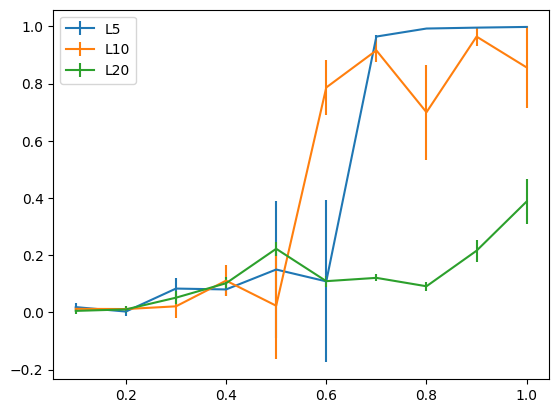

In [39]:
plt.errorbar(np.arange(0.1,1.1,0.1), L5[1], yerr=L5[2],label='L5')
plt.errorbar(np.arange(0.1,1.1,0.1), L10[1], yerr=L10[2],label='L10')
plt.errorbar(np.arange(0.1,1.1,0.1), L20[1], yerr=L20[2],label='L20')
plt.legend()
plt.show()